In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift
from scipy.signal import convolve2d

from Functions import *
from gaussfft import gaussfft
from fftwave import fftwave

In [2]:
def fftwave(u, v, sz = 128):
    Fhat = np.zeros([sz, sz])
    Fhat[u, v] = 1
    #Fhat[-u, -v] = 1

    
    F = np.fft.ifft2(Fhat)
    Fabsmax = np.max(np.abs(F))

    f = plt.figure()
    f = plt.figure(figsize=(6,9))
    f.subplots_adjust(wspace=0.2, hspace=0.4)
    plt.rc('axes', titlesize=10)
    a1 = f.add_subplot(3, 2, 1)
    showgrey(Fhat, False)
    a1.title.set_text("Fhat: (u, v) = (%d, %d)" % (u, v))

    # What is done by these instructions?
    if u < sz/2:
        uc = u
    else:
        uc = u - sz
    if v < sz/2:
        vc = v
    else:
        vc = v - sz

    wavelength = sz / np.sqrt(uc ** 2 + vc ** 2) # Replace by correct expression
    amplitude  = 1 / sz # Replace by correct expression

    a2 = f.add_subplot(3, 2, 2)
    showgrey(np.fft.fftshift(Fhat), False)
    a2.title.set_text("centered Fhat: (uc, vc) = (%d, %d)" % (uc, vc))

    a3 = f.add_subplot(3, 2, 3)
    showgrey(np.real(F), False, 64, -Fabsmax, Fabsmax)
    a3.title.set_text("real(F)")

    a4 = f.add_subplot(3, 2, 4)
    showgrey(np.imag(F), False, 64, -Fabsmax, Fabsmax)
    a4.title.set_text("imag(F)")

    a5 = f.add_subplot(3, 2, 5)
    showgrey(np.abs(F), False, 64, -Fabsmax, Fabsmax)
    a5.title.set_text("abs(F) (amplitude %f)" % amplitude)
    a6 = f.add_subplot(3, 2, 6)
    showgrey(np.angle(F), False, 64, -np.pi, np.pi)
    a6.title.set_text("angle(F) (wavelength %f)" % wavelength)
    
    plt.show()


<h2> Question 1</h2>

<Figure size 432x288 with 0 Axes>

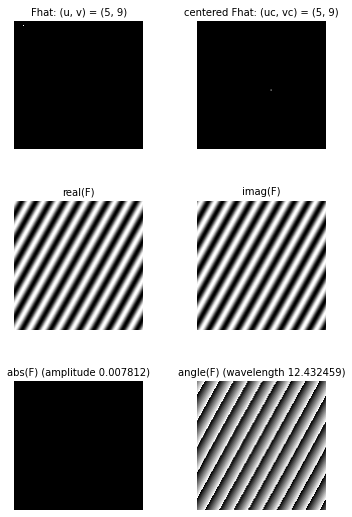

<Figure size 432x288 with 0 Axes>

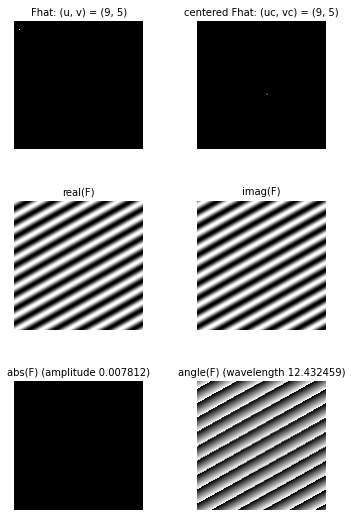

<Figure size 432x288 with 0 Axes>

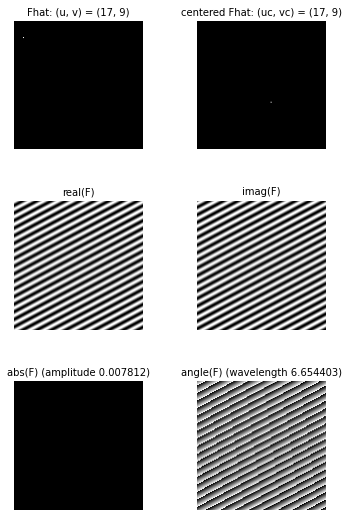

<Figure size 432x288 with 0 Axes>

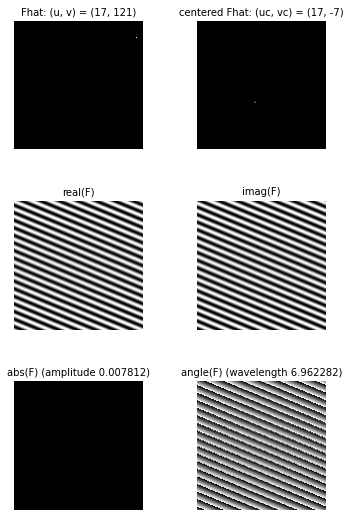

<Figure size 432x288 with 0 Axes>

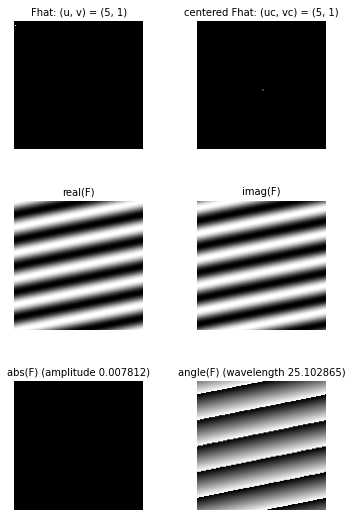

<Figure size 432x288 with 0 Axes>

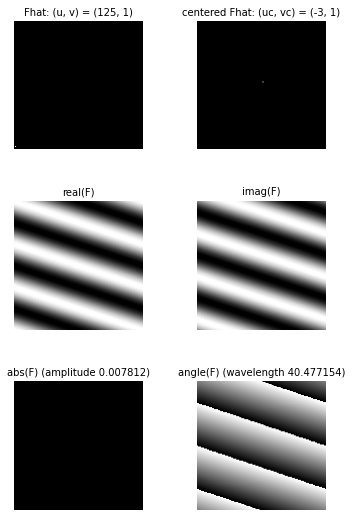

In [3]:
fftwave(5, 9)
fftwave(9, 5)
fftwave(17, 9)
fftwave(17, 121)
fftwave(5, 1)
fftwave(125, 1)

<h2> Question 2</h2>

<Figure size 432x288 with 0 Axes>

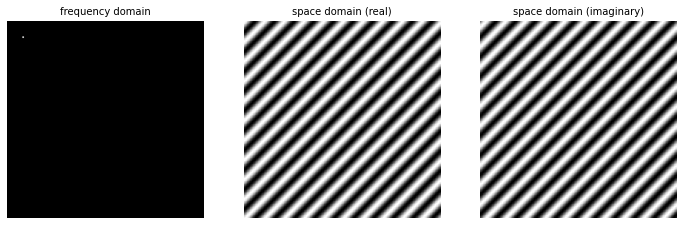

In [4]:
f = plt.figure()
f = plt.figure(figsize=(12,24))
f.subplots_adjust(wspace=0.2, hspace=0.4)

p = 10
v = 10
Fhat = np.zeros([128, 128])
Fhat[p, v] = 1
F = np.fft.ifft2(Fhat)
Fabsmax = np.max(np.abs(F))
a3 = f.add_subplot(1, 3, 1)
a3.title.set_text("frequency domain")
showgrey(Fhat, False)
a2 = f.add_subplot(1, 3, 2)
a2.title.set_text("space domain (real)")
showgrey(np.real(F), False)
a1 = f.add_subplot(1, 3, 3)
a1.title.set_text("space domain (imaginary)")
showgrey(np.imag(F), False)
plt.show()

<h2> Question 5</h2>

<Figure size 432x288 with 0 Axes>

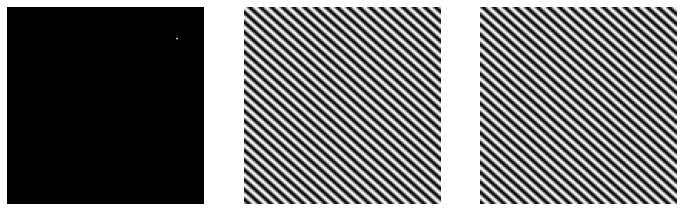

In [5]:
f = plt.figure()
f = plt.figure(figsize=(12,24))
f.subplots_adjust(wspace=0.2, hspace=0.4)

p = 20
v = 110
Fhat = np.zeros([128, 128])
Fhat[p, v] = 1
F = np.fft.ifft2(Fhat)
Fabsmax = np.max(np.abs(F))
a3 = f.add_subplot(1, 3, 1)
showgrey(Fhat, False)
a3 = f.add_subplot(1, 3, 2)
showgrey(np.real(F), False)
a3 = f.add_subplot(1, 3, 3)
showgrey(np.imag(F), False)
plt.show()

<h2> Question 7</h2>

<Figure size 432x288 with 0 Axes>

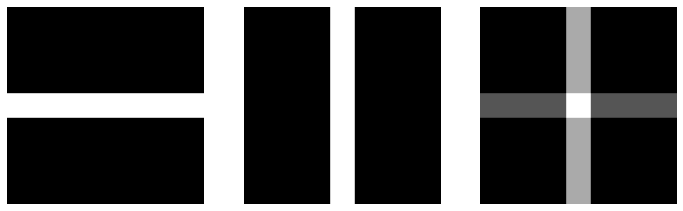

<Figure size 432x288 with 0 Axes>

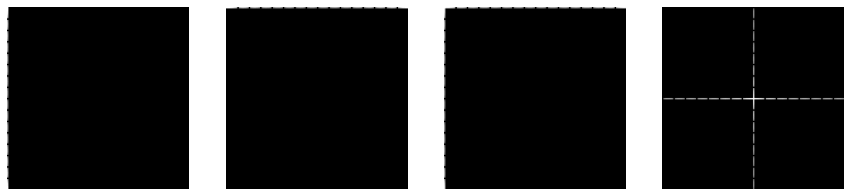

In [6]:
F = np.concatenate([np.zeros((56, 128)), np.ones((16, 128)), np.zeros((56, 128))])
G = F.T
H = F + 2 * G

f = plt.figure()
f.subplots_adjust(wspace=0.2, hspace=0.4)
f = plt.figure(figsize=(12,24))

f1 = f.add_subplot(1, 3, 1)
showgrey(F, False)
f1 = f.add_subplot(1, 3, 2)
showgrey(G, False)
f1 = f.add_subplot(1, 3, 3)
showgrey(H, False)

plt.show()

Fhat = fft2(F)
Ghat = fft2(G)
Hhat = fft2(H)

f = plt.figure()
f.subplots_adjust(wspace=0.2, hspace=0.4)
f = plt.figure(figsize=(15,30))

f3 = f.add_subplot(1, 4, 1)
showgrey(np.log(1 + np.abs(Fhat)), False)
f3 = f.add_subplot(1, 4, 2)
showgrey(np.log(1 + np.abs(Ghat)), False)
f3 = f.add_subplot(1, 4, 3)
showgrey(np.log(1 + np.abs(Hhat)), False)
f3 = f.add_subplot(1, 4, 4)
showgrey(np.log(1 + np.abs(fftshift(Hhat))), False)

<h2> Question 8</h2>

<Figure size 432x288 with 0 Axes>

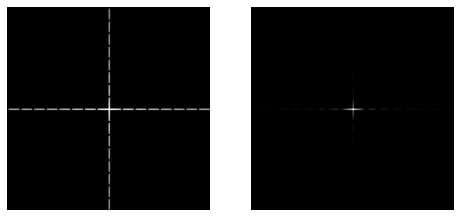

In [7]:
f = plt.figure()
f.subplots_adjust(wspace=0.2, hspace=0.4)
f = plt.figure(figsize=(8,20))

G = F.T
H = F + 2 * G
Hhat = fft2(H)
f3 = f.add_subplot(1, 2, 1)
showgrey(np.log(1 + np.abs(fftshift(Hhat))), False)
f3 = f.add_subplot(1, 2, 2)
showgrey(1 + np.abs(fftshift(Hhat)), False)

<h2> Question 9</h2>

<Figure size 432x288 with 0 Axes>

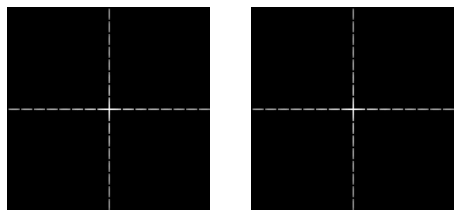

In [8]:
f = plt.figure()
f.subplots_adjust(wspace=0.2, hspace=0.4)
f = plt.figure(figsize=(8,20))

G = F.T
H = F + 2 * G
Fhat = fft2(F)
Ghat = fft2(G)
Hhat = fft2(H)
Hhat2 = Fhat + 2*Ghat
f3 = f.add_subplot(1, 2, 1)
showgrey(np.log(1 + np.abs(fftshift(Hhat))), False)
f3 = f.add_subplot(1, 2, 2)
showgrey(np.log(1 + np.abs(fftshift(Hhat2))), False)

<h2> Question 10</h2>

<Figure size 432x288 with 0 Axes>

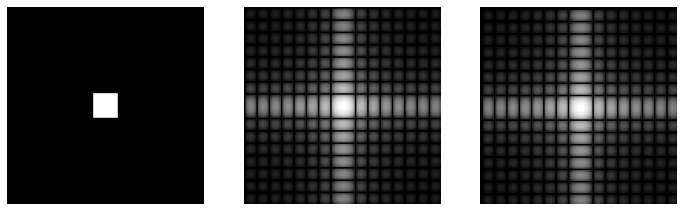

In [9]:
G = F.T
f = plt.figure()
f.subplots_adjust(wspace=0.2, hspace=0.4)
f = plt.figure(figsize=(12,24))
plt.rc('axes', titlesize=10)

f1 = f.add_subplot(1, 3, 1)
showgrey(F * G, False)
f2 = f.add_subplot(1, 3, 2)
showfs(fft2(F * G), False)
Fhat = fft2(F)
Ghat = fft2(G)
f3 = f.add_subplot(1, 3, 3)
showfs(fftshift(convolve2d(fftshift(Fhat) / 128, fftshift(Ghat) / 128, 'same')), False)
plt.show()

<h2> Question 11</h2>

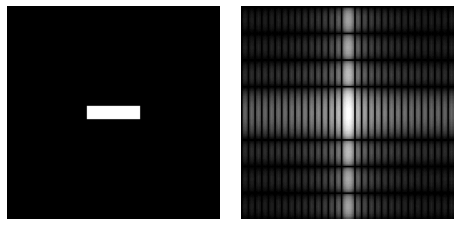

In [10]:
f = plt.figure(figsize=(8,20))
f.subplots_adjust(wspace=0.1, hspace=0.2)

F = np.concatenate([np.zeros((60, 128)), np.ones((8, 128)), np.zeros((60, 128))]) * np.concatenate(
    [np.zeros((128, 48)), np.ones((128, 32)), np.zeros((128, 48))], axis=1)
s = f.add_subplot(1, 2, 1)
showgrey(F, False)
s = f.add_subplot(1, 2, 2)
showfs(fft2(F), False)

<h2> Question 12</h2>

<Figure size 432x288 with 0 Axes>

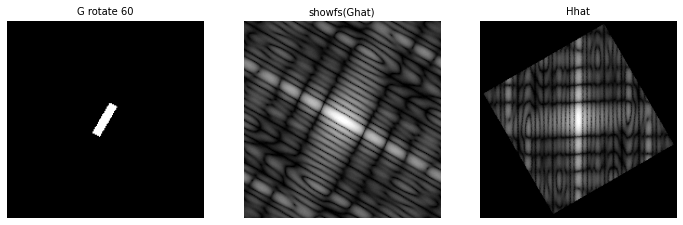

In [11]:
alpha = 60
G = rot(F, alpha)

f = plt.figure()
f = plt.figure(figsize=(12,24))
f.subplots_adjust(wspace=0.2, hspace=0.4)
plt.rc('axes', titlesize=10)

a1 = f.add_subplot(1, 3, 1)
showgrey(G, False)
a1.title.set_text("G rotate %d" % alpha)

Ghat = fft2(G)
a2 = f.add_subplot(1, 3, 2)
showfs(Ghat, False)
a2.title.set_text("showfs(Ghat)")

Hhat = rot(fftshift(Ghat), -alpha)
a4 = f.add_subplot(1, 3, 3)
showgrey(np.log(1 + abs(Hhat)), False)
a4.title.set_text("Hhat")
plt.show()

<h2> Question 13</h2>

<Figure size 432x288 with 0 Axes>

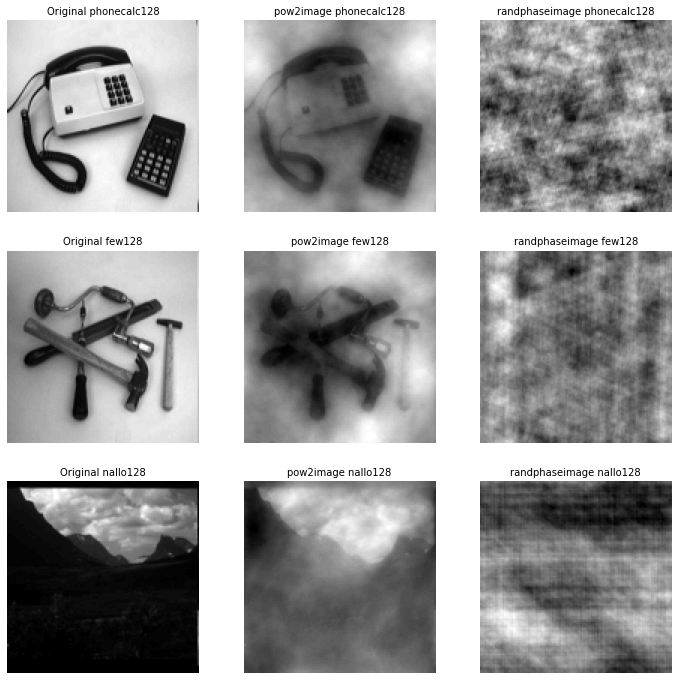

In [12]:
f = plt.figure()
f.subplots_adjust(wspace=0.2, hspace=0.4)
f = plt.figure(figsize=(12,12))
plt.rc('axes', titlesize=10)

a = 1/1000
phonecalc128 = np.load("Images-npy/phonecalc128.npy")
few128 = np.load("Images-npy/few128.npy")
nallo128 = np.load("Images-npy/nallo128.npy")

imgList = [phonecalc128, few128, nallo128]
imgName = ["phonecalc128", "few128", "nallo128"]
n = 1
i = 0
for img in imgList:
    a1 = f.add_subplot(3, 3, n)
    showgrey(img, False)
    a1.title.set_text("Original " + imgName[i])
    a2 = f.add_subplot(3, 3, n+1)
    showgrey(pow2image(img, a), False)
    a2.title.set_text("pow2image " + imgName[i])
    a3 = f.add_subplot(3, 3, n+2)
    showgrey(randphaseimage(img), False)
    a3.title.set_text("randphaseimage " + imgName[i])
    n = n + 3
    i = i + 1


plt.show()


<h2> Question 14</h2>

In [13]:
def gaussian(x, y, t):
    c = 1 / (2 *  np.pi * t)
    return c * np.e ** ( - (x * x + y * y) / (2 * t) )

def gaussfft(pic, t = 1):
    x_size, y_size = pic.shape[0], pic.shape[1]
    x_axis = np.linspace(-x_size/2, +x_size/2, num=x_size)
    y_axis = np.linspace(-y_size/2, +y_size/2, num=y_size)
    xx, yy = np.meshgrid(x_axis, y_axis)
    zz = gaussian(xx, yy, t)

    gaussian_fft = fft2(zz)
    image_fft = fft2(pic)
    
    result = ifft2(image_fft * gaussian_fft)
  
#     max_ = np.max(np.abs(gaussian_fft))
#     showgrey(np.abs(fftshift(gaussian_fft)), False, 64, -max_, +max_)
#     plt.show()
    return fftshift(result)

t = 0.1
[[ 2.50077519e-01 -5.38415366e-14]
 [-5.38415366e-14  2.50077519e-01]]

t = 0.3
[[3.15692140e-01 3.57091094e-14]
 [3.57091094e-14 3.15692140e-01]]

t = 1
[[9.84436313e-01 9.67161363e-14]
 [9.67161363e-14 9.84436313e-01]]

t = 10
[[ 9.84436035e+00 -3.60300636e-14]
 [-3.60300636e-14  9.84436035e+00]]

t = 100
[[9.84436031e+01 1.50905149e-13]
 [1.50905149e-13 9.84436031e+01]]



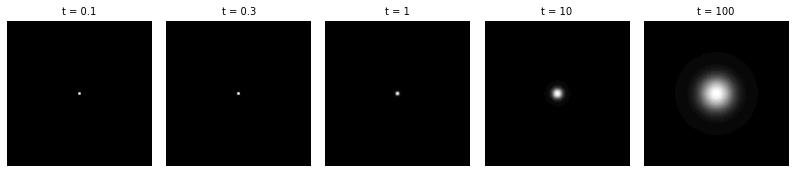

In [14]:
variances = [0.1, 0.3, 1, 10, 100]
N = len(variances)

f = plt.figure(figsize=(14,3))
f.subplots_adjust(wspace=0.1, hspace=0.2)
for i in range(N):
    psf = gaussfft(deltafcn(128,128), variances[i])
    max_ = np.max(np.abs(psf))
    s = f.add_subplot(1, N, i + 1)
    s.title.set_text("t = " +str(variances[i]))

    showgrey(np.real(psf), False, 64, -max_, +max_)
    
    print("t = "+ str(variances[i]))
    print(variance(psf))
    print()
    #plt.matshow(np.abs(psf))
plt.show()


<h2> Question 16</h2>

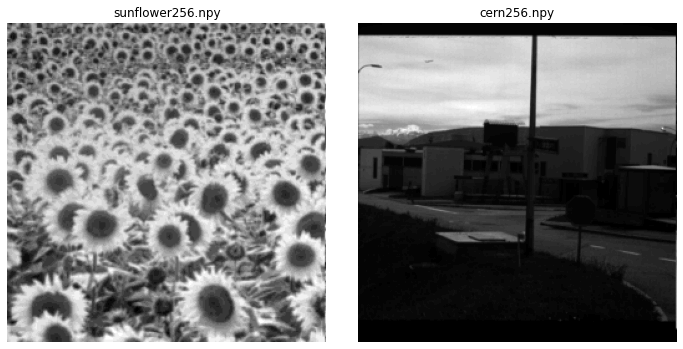

t = 1
[[5454.59972958  -21.07973715]
 [ -21.07973715 5276.46638978]]

t = 4
[[5454.70443028  -21.01403452]
 [ -21.01403452 5276.53784414]]

t = 16
[[5454.91300289  -19.64575057]
 [ -19.64575057 5276.81749132]]

t = 64
[[5455.33743767  -14.29204616]
 [ -14.29204616 5278.10604948]]

t = 256
[[5456.31198406   -6.60404949]
 [  -6.60404949 5284.45979372]]



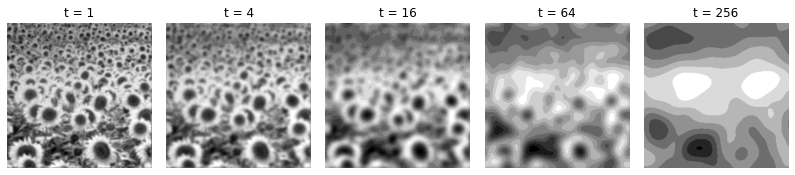

t = 1
[[5437.17046323  146.92245357]
 [ 146.92245357 2441.27489064]]

t = 4
[[5438.19130327  130.69352508]
 [ 130.69352508 2447.31524239]]

t = 16
[[5440.12692798  116.77665959]
 [ 116.77665959 2469.02160981]]

t = 64
[[5443.59382609   99.27079488]
 [  99.27079488 2655.46510667]]

t = 256
[[5449.42656244   78.94703969]
 [  78.94703969 3402.13380041]]



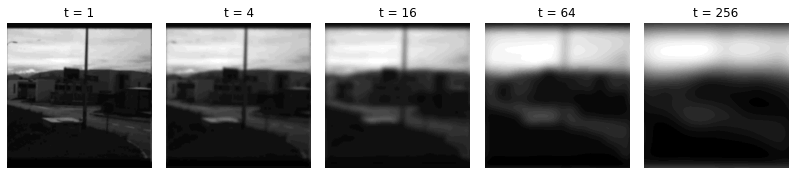

In [197]:
variances = [1, 4, 16, 64, 256]
N = len(variances)

f = plt.figure(figsize=(12,24))
f.subplots_adjust(wspace=0.1, hspace=0.2)

img = np.load("Images-npy/sunflower256.npy")
max_ = np.max(np.abs(img))
s1 = f.add_subplot(1, 2, 1)
s1.title.set_text("sunflower256.npy")
showgrey(img, False, 64, -max_, max_)

img2 = np.load("Images-npy/cern256.npy")
max_ = np.max(np.abs(img2))
s1 = f.add_subplot(1, 2, 2)
s1.title.set_text("cern256.npy")
showgrey(img2, False, 64, -max_, max_)
plt.show()

f = plt.figure(figsize=(14,3))
f.subplots_adjust(wspace=0.1, hspace=0.2)
for i in range(N):
    psf = gaussfft(img, variances[i])
    max_ = np.max(np.abs(psf))
    s = f.add_subplot(1, N, i + 1)
    s.title.set_text("t = " +str(variances[i]))
    showgrey(np.real(psf), False, 64, -max_, +max_)
    
    print("t = "+ str(variances[i]))
    print(variance(psf))
    print()
    #plt.matshow(np.abs(psf))
plt.show()




f = plt.figure(figsize=(14,3))
f.subplots_adjust(wspace=0.1, hspace=0.2)
for i in range(N):
    psf = gaussfft(img2, variances[i])
    max_ = np.max(np.abs(psf))
    s = f.add_subplot(1, N, i + 1)
    s.title.set_text("t = " +str(variances[i]))
    showgrey(np.real(psf), False, 64, -max_, +max_)
    
    print("t = "+ str(variances[i]))
    print(variance(psf))
    print()
    #plt.matshow(np.abs(psf))
plt.show()

<h2> Question 17</h2>

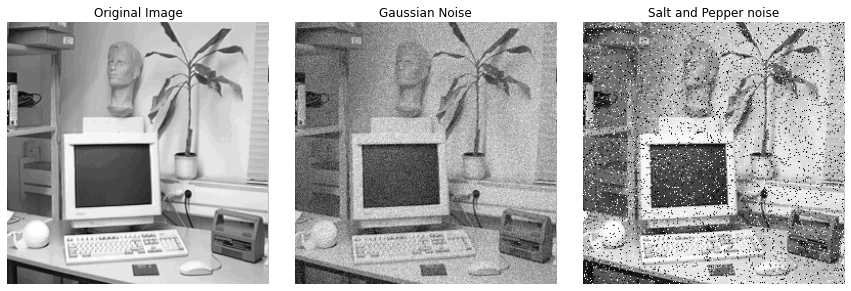

In [188]:
office = np.load("Images-npy/office256.npy")


f = plt.figure(figsize=(15,5))
f.subplots_adjust(wspace=0.1, hspace=0.2)

max_office = np.max(np.abs(office))
s1 = f.add_subplot(1, 3, 1)
s1.title.set_text("Original Image")
showgrey(office, False, 64, -max_office, max_office)



add = gaussnoise(office, 16)
sap = sapnoise(office, 0.1, 255)

max_add = np.max(np.abs(add))
s2 = f.add_subplot(1, 3, 2)
s2.title.set_text("Gaussian Noise")
showgrey(add, False, 64, -max_add, max_add)

s3 = f.add_subplot(1, 3, 3)
s3.title.set_text("Salt and Pepper noise")
max_sap = np.max(np.abs(sap))
showgrey(sap, False, 64, -max_sap, max_sap)
plt.show()

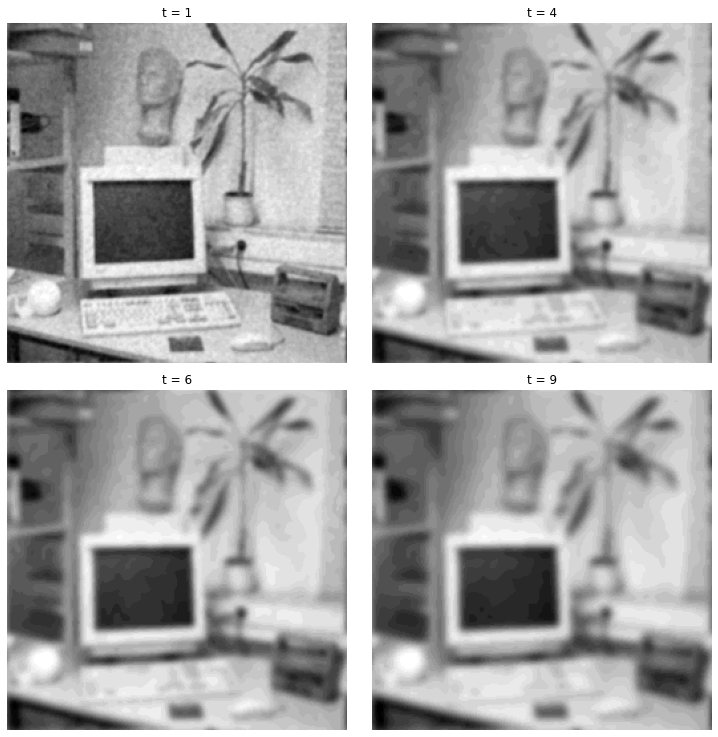

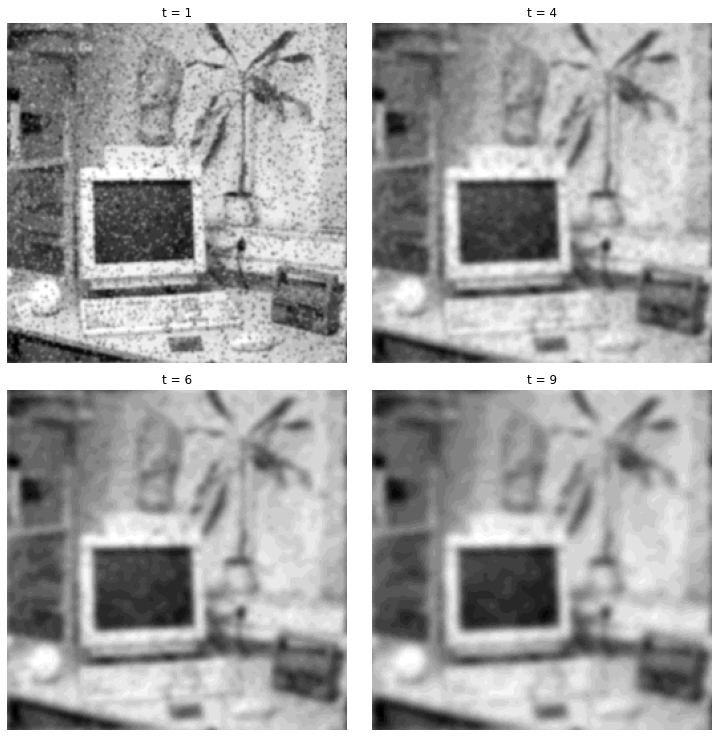

In [238]:
variances = [1, 4, 6, 9]
N = len(variances)

f = plt.figure(figsize=(13,13))
f.subplots_adjust(wspace=0.01, hspace=0.08)
for i in range(N):
    gaussian_filter = gaussfft(add, variances[i])
    max_ = np.max(np.abs(gaussian_filter))
    s = f.add_subplot(2, 2, i + 1)
    s.title.set_text("t = " +str(variances[i]))
    showgrey(np.real(gaussian_filter), False, 64, -max_, max_)
plt.show()


f = plt.figure(figsize=(13,13))
f.subplots_adjust(wspace=0.01, hspace=0.08)
for i in range(N):
    gaussian_filter = gaussfft(sap, variances[i])
    max_ = np.max(np.abs(gaussian_filter))
    s = f.add_subplot(2, 2, i + 1)
    s.title.set_text("t = " +str(variances[i]))
    showgrey(np.real(gaussian_filter), False, 64, -max_, max_)
plt.show()

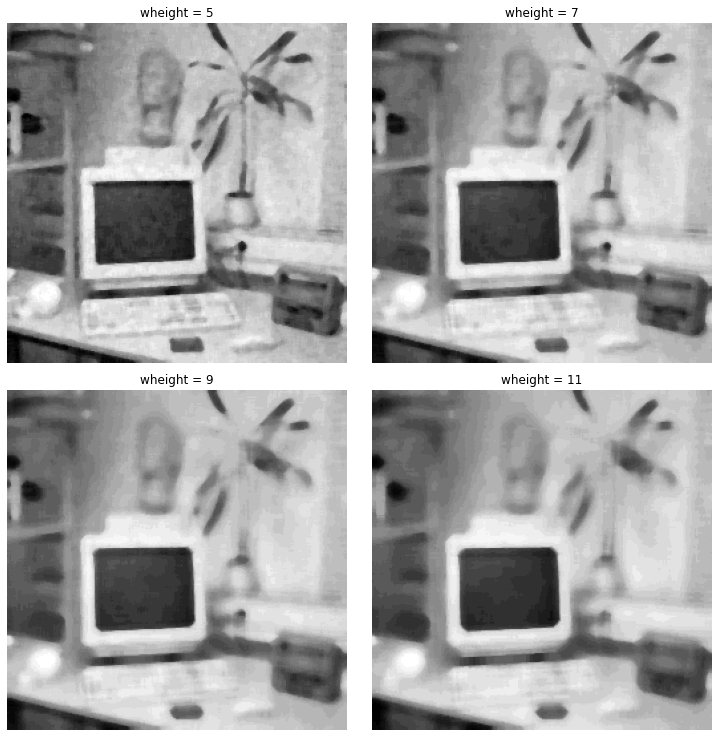

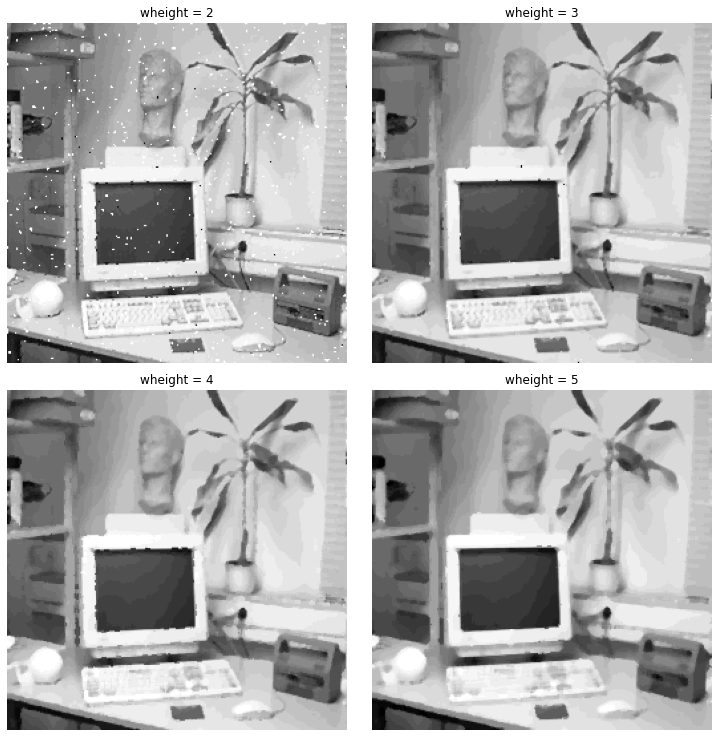

In [207]:
wheight = [5, 7 , 9, 11]
N = len(wheight)

f = plt.figure(figsize=(13,13))
f.subplots_adjust(wspace=0.01, hspace=0.08)
for i in range(N):
    med_filter = medfilt(add, wheight[i])
    max_ = np.max(np.abs(med_filter))
    s = f.add_subplot(2, 2, i + 1)
    s.title.set_text("wheight = " +str(wheight[i]))
    showgrey(np.real(med_filter), False, 64, -max_, max_)
plt.show()


wheight = [2, 3, 4, 5]

f = plt.figure(figsize=(13,13))
f.subplots_adjust(wspace=0.01, hspace=0.08)
for i in range(N):
    med_filter = medfilt(sap, wheight[i])
    max_ = np.max(np.abs(med_filter))
    s = f.add_subplot(2, 2, i + 1)
    s.title.set_text("wheight = " +str(wheight[i]))
    showgrey(np.real(med_filter), False, 64, -max_, max_)
plt.show()


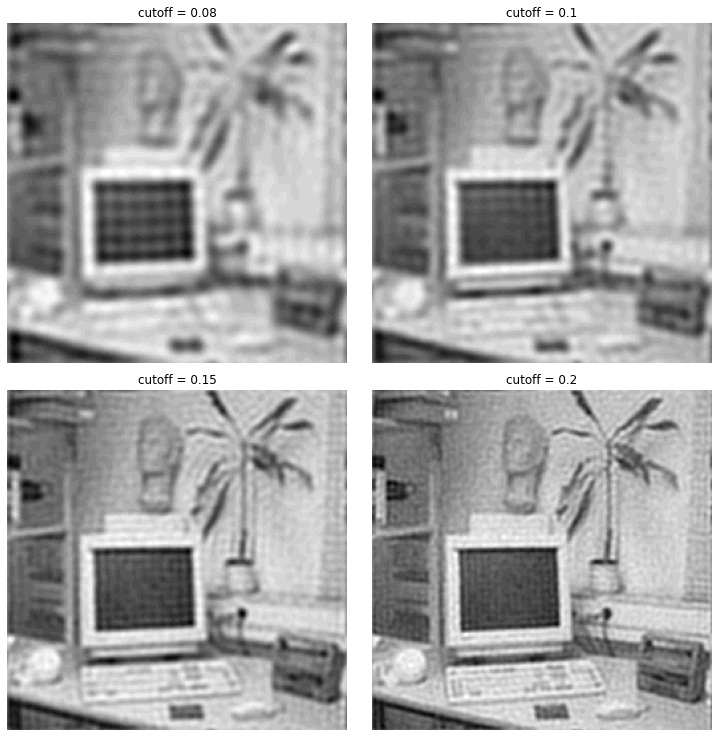

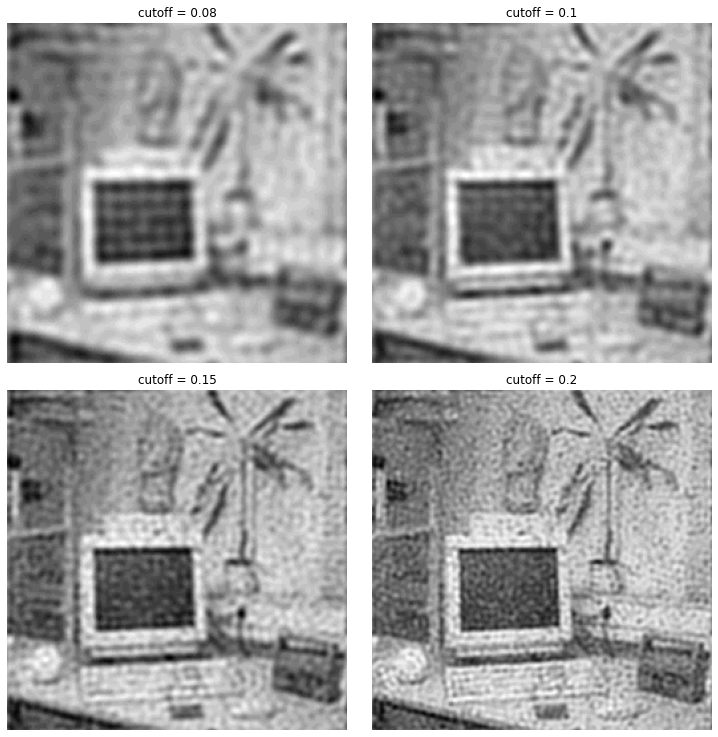

In [209]:
cutoff = [0.08, 0.1, 0.15, 0.2]
N = len(variances)

f = plt.figure(figsize=(13,13))
f.subplots_adjust(wspace=0.01, hspace=0.08)
for i in range(N):
    ideal_filter = ideal(add, cutoff[i])
    max_ = np.max(np.abs(ideal_filter))
    s = f.add_subplot(2, 2, i + 1)
    s.title.set_text("cutoff = " +str(cutoff[i]))
    showgrey(np.real(ideal_filter), False, 64, -max_, max_)
plt.show()


cutoff = [0.08, 0.1, 0.15, 0.2]

f = plt.figure(figsize=(13,13))
f.subplots_adjust(wspace=0.01, hspace=0.08)
for i in range(N):
    ideal_filter = ideal(sap, cutoff[i])
    max_ = np.max(np.abs(ideal_filter))
    s = f.add_subplot(2, 2, i + 1)
    s.title.set_text("cutoff = " +str(cutoff[i]))
    showgrey(np.real(ideal_filter), False, 64, -max_, max_)
plt.show()


<h2> Question 19</h2>

<Figure size 432x288 with 0 Axes>

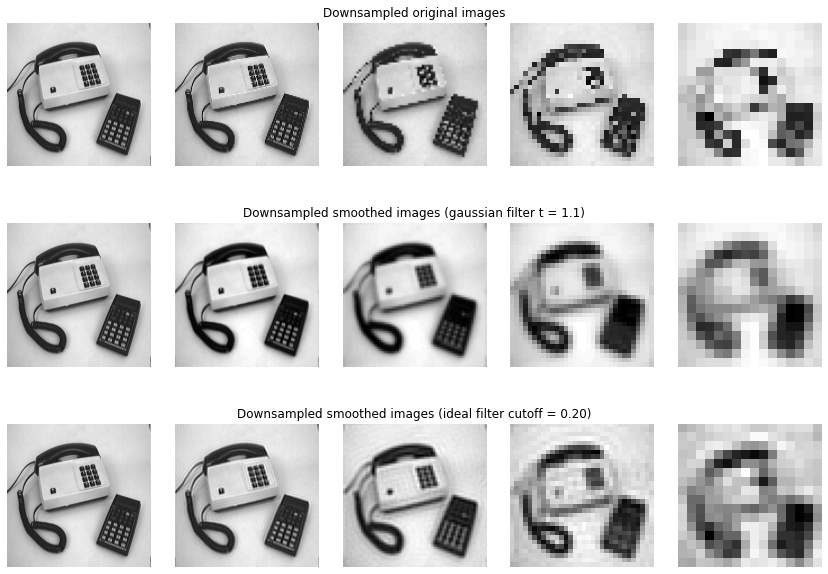

In [236]:
img = np.load("Images-npy/phonecalc256.npy")
smoothimg_gauss = smoothimg_ideal = img
N = 5
f = plt.figure()
f = plt.figure(figsize=(15,10))
f.subplots_adjust(wspace=0.01, hspace=0.40)



for i in range(N):
    if i>0: # generate subsampled versions
        img = rawsubsample(img)
        smoothimg_gauss = gaussfft(smoothimg_gauss, t=1.1)
        smoothimg_gauss = rawsubsample(smoothimg_gauss)
        
        smoothimg_ideal = ideal(smoothimg_ideal, cutoff=0.20)
        smoothimg_ideal = rawsubsample(smoothimg_ideal)
    s_original = f.add_subplot(3, N, i + 1)
    showgrey(img, False)
    s_smooth_gauss = f.add_subplot(3, N, i + N + 1)
    showgrey(np.real(smoothimg_gauss), False)
    s_smooth_ideal = f.add_subplot(3, N, i + N*2 + 1)
    showgrey(np.real(smoothimg_ideal), False)
    
    if i == 2:
            s_original.title.set_text("Downsampled original images")
            s_smooth_gauss.title.set_text("Downsampled smoothed images (gaussian filter t = 1.1)")
            s_smooth_ideal.title.set_text("Downsampled smoothed images (ideal filter cutoff = 0.20)")

plt.show()



#### 